<h1>Using the Last Fm API to extract data and analyzing it with Python. (Part 2)</h1>

As you already know, Last Fm is a service (kind of a social network) to store your music listening activity, that is called *scrobbling*, and I have been using that service since late 2008. The goal of this project is to create new visualization, Last Fm itself shows some nice charts and numbers but I wanted a little more.


In the first part of the project I extracted and cleaned the data using Python, If you wanna read it, please go to this link: https://github.com/chmedinap/my-data-science-practices/blob/master/Lastfm-Python-pt1.ipynb

In this second part I'm going to show you how to manipulate the data with Pandas 🐼  and some basic charts using Seaborn 🐍, but please keep in mind that **I'm new in the data analytics/science world and English is not my native language. I'm still learning. If you could give  me your feedback about these two topics, I would really appreciate it.** 🤗

For this post I'm going to use the extracted data from my friend Maria and I. We both have used Last Fm since 2009 in a regular basis and we have different tastes in music. 

What I'm going to do: 
* 👾 Search missing fields in the data (Nan)
* 👾 Plot the timeline for both users.
* 👾 Graph the scrobbling trend month by month.
* 👾 Show the most listened artist per year. 
* 👾 Find the artists we have in common. 

<h2> 🤓 Changing the name of the columns:</h2>

For a better understanding I changed some names and dropped some columns I didn't need.

Read the files

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import pyplot

In [2]:
df_ch = pd.read_csv('../Archivos/LastFm/Carlos_scrob.csv')
df_maria = pd.read_csv('../Archivos/LastFm/Maria_scrob.csv')


Changed names and drop

In [3]:
df_ch=df_ch.drop(['uts','artist_mbid','album_mbid','track_mbid'],axis = 1)
df_ch.columns=['Date','Artist','Album','Song']
df_maria=df_maria.drop(['uts','artist_mbid','album_mbid','track_mbid'],axis = 1)
df_maria.columns=['Date','Artist','Album','Song']

Added columns

In [6]:
df_ch['User']='Ch'
df_maria['User']= 'Maria'

At this point the data-frame looked like this:

In [9]:
df_maria.head(5)

,Date,Artist,Album,Song,User
0,"23 Aug 2021, 16:17",Grouplove,Never Trust a Happy Song,Tongue Tied,Maria
1,"23 Aug 2021, 16:13",Phoenix,Wolfgang Amadeus Phoenix,Lisztomania,Maria
2,"23 Aug 2021, 16:08",White Lies,To Lose My Life ...,Fifty on Our Foreheads,Maria
3,"23 Aug 2021, 16:03",Justice,We Are Your Friends,We Are Your Friends - Justice Vs Simian,Maria
4,"23 Aug 2021, 15:58",MGMT,Little Dark Age,Me and Michael,Maria


<h2>🧯Missing fields in the data</h2>
When you are working with new data-frames, I recomend to always search for missing values because it gives you a better understanding of the data and it helps you to avoid mistakes.

In [10]:
percent_missing_ch=df_ch.isnull().sum()*100/len(df_ch)
percent_missing_maria=df_maria.isnull().sum()*100/len(df_maria)
df_missing_value=pd.DataFrame(
    {
    'Ch':percent_missing_ch,
    'Maria':percent_missing_maria,
    })
df_missing_value

,Ch,Maria
Date,0.000000,0.000000
Artist,0.000000,0.000000
Album,7.886792,1.818633
Song,0.000000,0.000000
User,0.000000,0.000000


As you can see, there is some missing data in the "Album" column. That happens because sometimes Last Fm does not match the correct names. For example: 
For us the song: 

| Master of Puppets  | Metallica | S&M   |

is the same that

| Master of Puppets | Metallica | Symphony and Metallica |


But for Last Fm is not because the official album name is "S&M", so the other name does not match and it will be left empty and that is our nan in the data. 

<h2> 🔌 Plot the timeline for both users.</h2>

I wanted to do a simple timeline showing how many songs each user listened over the years. The first thing was to extract the year and the month from the "Date" column.



In [11]:
df_ch['Date']=pd.to_datetime(df_ch['Date'])
df_ch['Year']=pd.DatetimeIndex(df_ch['Date']).year
df_ch['Month']=pd.DatetimeIndex(df_ch['Date']).month
df_maria['Date']=pd.to_datetime(df_maria['Date'])
df_maria['Year']=pd.DatetimeIndex(df_maria['Date']).year
df_maria['Month']=pd.DatetimeIndex(df_maria['Date']).month

The result was this

In [14]:
df_ch.head(5)

,Date,Artist,Album,Song,User,Year,Month
0,2021-08-26 00:29:00,King Crimson,Larks' Tongues In Aspic (Expanded & Remastered...,Larks' Tongues in Aspic (Part I),Ch,2021,8
1,2021-08-26 00:23:00,Coheed and Cambria,Good Apollo I'm Burning Star IV Volume One: Fr...,Welcome Home,Ch,2021,8
2,2021-08-26 00:15:00,Marillion,Script For A Jester's Tear,Forgotten Sons - 1997 Remaster,Ch,2021,8
3,2021-08-26 00:09:00,Steve Hackett,Voyage Of The Acolyte,Ace Of Wands - Remastered 2005,Ch,2021,8
4,2021-08-25 23:47:00,Yes,Relayer (Deluxe Edition),The Gates of Delirium - 2003 Remaster,Ch,2021,8


Now, the next stept was to group by and transform to dataframe 📂. 

For my data:

In [16]:
ChbyYear=df_ch.groupby(df_ch.Year).Song.count()
df_ChbyYear=ChbyYear.to_frame()
df_ChbyYear['User']='Ch'
df_ChbyYear['Year']= ChbyYear.index
df_ChbyYear.reset_index(drop=True, inplace=True)

For Maria's data

In [17]:
MariabyYear=df_maria.groupby(df_maria.Year).Song.count()
df_MariabyYear=MariabyYear.to_frame()
df_MariabyYear['User']='Maria'
df_MariabyYear['Year']= MariabyYear.index
df_MariabyYear.reset_index(drop=True, inplace=True)

Then, plot

<AxesSubplot:title={'center':'Scrobbling trend throughout the years'}, xlabel='Year', ylabel='Scrobbling'>

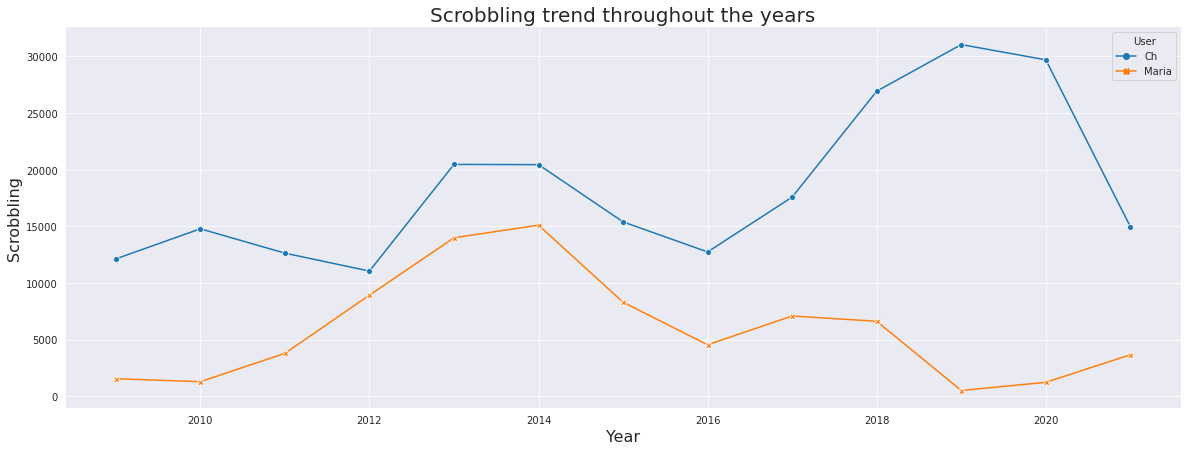

In [36]:
df_concatenated = pd.concat([df_ChbyYear, df_MariabyYear])
fig, ax1 =pyplot.subplots(figsize=(20,7))
plt.title('Scrobbling trend throughout the years', fontsize = 20) 
plt.xlabel('Year', fontsize=16)
plt.ylabel('Scrobbling', fontsize=16)
sns.set_style("darkgrid")
sns.despine()
sns.lineplot(data=df_concatenated,
            x="Year", 
            y="Song",
            hue="User",
            style="User",
            markers=True, dashes=False)

As you can see, we both started in the same year but I used to save way more scrobbling songs than Maria. An important thing in this is that Maria reduced the listening in 2020, but mine almost duplicated.

<h2> 🏮 Graph the scrobbling trend month by month.</h2>

In this I did heatmaps, I think is the best way. For this I grouped the data by month selecting a year and then count the songs: 

For my data:

In [19]:
x=2008
dfs=[]
while x<2022:
    year_tmp=df_ch[df_ch['Year']==x]
    year_tmp=year_tmp.groupby('Month').Song.count()
    df_temp1=year_tmp.to_frame()
    df_temp1.columns=['Count']
    df_temp1['Month']= year_tmp.index
    df_temp1.reset_index(drop=True, inplace=True)
    df_temp2=df_temp1.sort_values('Count', ascending=False)
    df_temp2['Year']=x
    df_temp2.reset_index(drop=True, inplace=True)
    dfs.append(df_temp2)
    x=x+1
df_ChbyMonthYear=pd.concat(dfs, ignore_index=True)
df_ChHeat=df_ChbyMonthYear.pivot('Month','Year','Count')

For Maria's data

In [20]:
y=2008
dfs=[]
while y<2022:
    year_tmp=df_maria[df_maria['Year']==y]
    year_tmp=year_tmp.groupby('Month').Song.count()
    df_temp1=year_tmp.to_frame()
    df_temp1.columns=['Count']
    df_temp1['Month']= year_tmp.index
    df_temp1.reset_index(drop=True, inplace=True)
    df_temp2=df_temp1.sort_values('Count', ascending=False)
    df_temp2['Year']=y
    df_temp2.reset_index(drop=True, inplace=True)
    dfs.append(df_temp2)
    y=y+1
df_MariabyMonthYear=pd.concat(dfs, ignore_index=True)
df_MariaHeat=df_MariabyMonthYear.pivot('Month','Year','Count')

The most importang thing in here was to pivot data. The final result was this:

In [22]:
df_MariaHeat

Year,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Month,,,,,,,,,,,,,
1,NaN,140.0,NaN,654.0,1114.0,1795.0,1240.0,70.0,609.0,1739.0,14.0,NaN,246.0
2,NaN,329.0,NaN,146.0,1566.0,780.0,344.0,224.0,306.0,646.0,55.0,NaN,602.0
3,NaN,124.0,19.0,149.0,916.0,350.0,441.0,424.0,164.0,573.0,44.0,NaN,680.0
4,NaN,78.0,430.0,444.0,1357.0,1135.0,532.0,530.0,175.0,800.0,NaN,NaN,509.0
5,NaN,89.0,505.0,235.0,1284.0,1425.0,358.0,1378.0,792.0,827.0,50.0,NaN,306.0
6,NaN,41.0,333.0,615.0,1704.0,1988.0,683.0,727.0,468.0,364.0,133.0,NaN,714.0
7,NaN,176.0,487.0,186.0,946.0,1054.0,647.0,309.0,759.0,292.0,130.0,NaN,551.0
8,227.0,300.0,339.0,617.0,629.0,1435.0,1064.0,299.0,108.0,548.0,NaN,NaN,45.0
9,116.0,NaN,651.0,1337.0,747.0,744.0,318.0,140.0,696.0,399.0,65.0,NaN,NaN


The heatmaps

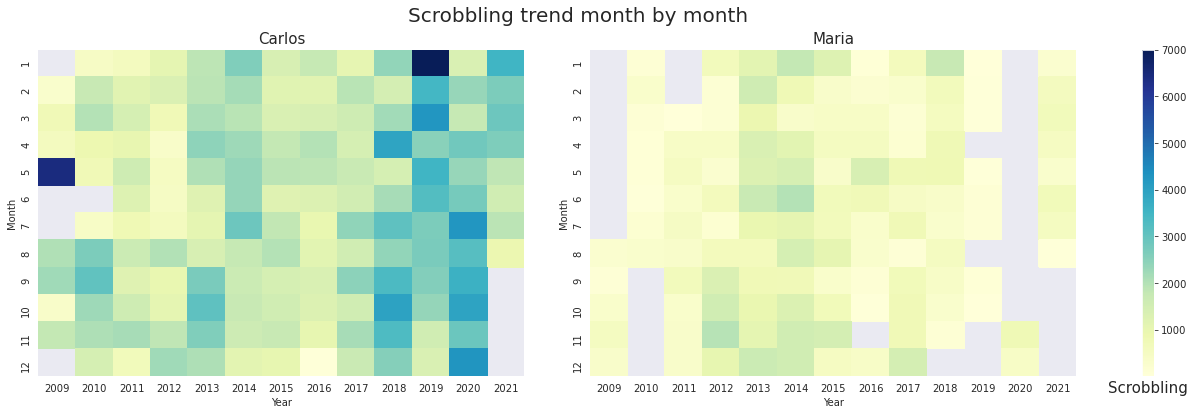

In [37]:
fig, ax2 = plt.subplots(ncols=3,figsize=(20,6) ,gridspec_kw=dict(width_ratios=[20,20,0.5]))
plt.suptitle('Scrobbling trend month by month', fontsize = 20) 
plt.xlabel('Scrobbling', fontsize = 15) 
ax2[0].set_title('Carlos',fontsize = 15)
ax2[1].set_title('Maria',fontsize = 15)
sns.heatmap(df_ChHeat, annot=False, cbar=False, ax=ax2[0], vmin=1,cmap="YlGnBu")
sns.heatmap(df_MariaHeat, annot=False, yticklabels=True, cbar=False, ax=ax2[1], vmax=7000,cmap="YlGnBu")
fig.colorbar(ax2[1].collections[0], cax=ax2[2])
plt.show()

<h2> 📌 Show the most listened artist per year.</h2>
Similar to the last, some grouping and then plot

In [39]:
x=2008
dfs=[]
while x<2022:
    year_tmp=df_ch[df_ch['Year']==x]
    year_tmp=year_tmp.groupby('Artist').Artist.count()
    df_temp1=year_tmp.to_frame()
    df_temp1.columns=['Count']
    df_temp1['Artist']= year_tmp.index
    df_temp1.reset_index(drop=True, inplace=True)
    df_temp2=df_temp1.sort_values('Count', ascending=False).head(1)
    df_temp2['Year']=x
    df_temp2.reset_index(drop=True, inplace=True)
    dfs.append(df_temp2)
    x=x+1
df_ChbyArtistYear=pd.concat(dfs, ignore_index=True)


And plot

Text(17.70017361111112, 0.5, 'Scrobbling')

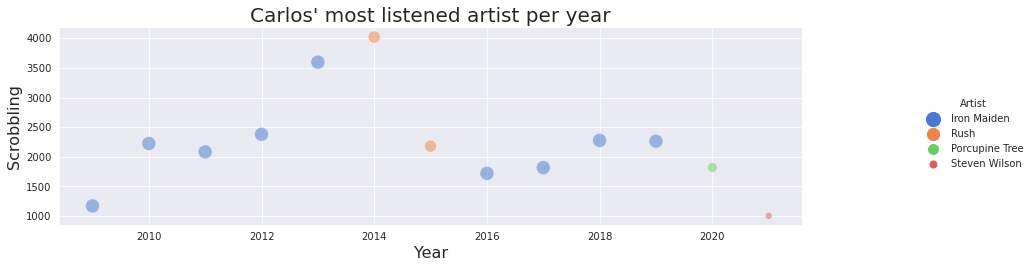

In [47]:
g=sns.relplot(x="Year", y="Count", hue="Artist", size="Artist",
            sizes=(50, 200), alpha=.5, palette="muted",
            height=6, data=df_ChbyArtistYear)
g.fig.set_size_inches(15,3)
sns.set_style("darkgrid")
plt.title("Carlos' most listened artist per year", fontsize = 20) 
plt.xlabel('Year', fontsize=16)
plt.ylabel('Scrobbling', fontsize=16)

For Maria:

In [41]:
x=2008
dfs=[]
while x<2022:
    year_tmp=df_maria[df_maria['Year']==x]
    year_tmp=year_tmp.groupby('Artist').Artist.count()
    df_temp1=year_tmp.to_frame()
    df_temp1.columns=['Count']
    df_temp1['Artist']= year_tmp.index
    df_temp1.reset_index(drop=True, inplace=True)
    df_temp2=df_temp1.sort_values('Count', ascending=False).head(1)
    df_temp2['Year']=x
    df_temp2.reset_index(drop=True, inplace=True)
    dfs.append(df_temp2)
    x=x+1
df_MariabyArtistYear=pd.concat(dfs, ignore_index=True)

And plot

Text(20.63194444444445, 0.5, 'Scrobbling')

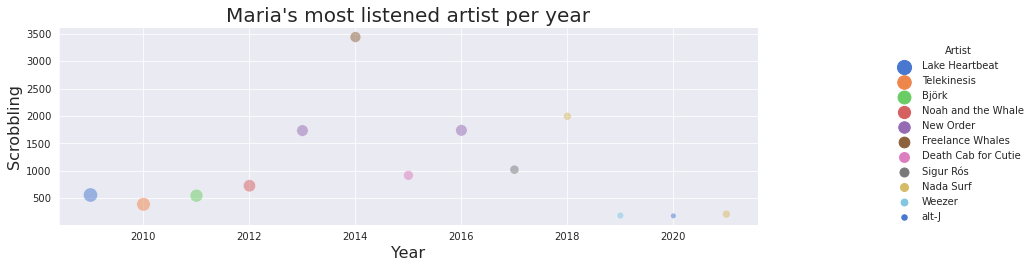

In [49]:
g=sns.relplot(x="Year", y="Count", hue="Artist", size="Artist",
            sizes=(30, 200), alpha=.5, palette="muted",
            height=6, data=df_MariabyArtistYear)
g.fig.set_size_inches(15,3)
sns.set_style("darkgrid")
plt.title("Maria's most listened artist per year", fontsize = 20) 
plt.xlabel('Year', fontsize=16)
plt.ylabel('Scrobbling', fontsize=16)

<h2> 📜 Find the artists we have in common.</h2>
Before that, I needed to know the percent of artists we have in common, but this was a sad 6.5 %

In [29]:
year_tmp3=df_maria.groupby('Artist').Song.count()
df_temp3=year_tmp3.to_frame()
df_temp3.columns=['Count']
df_temp3['Artist']= df_temp3.index
df_temp3['User']= 'Maria'
df_temp3.reset_index(drop=True, inplace=True)
df_MariaArtist=df_temp3.sort_values('Count', ascending=False)

In [30]:
year_tmp3=df_ch.groupby('Artist').Song.count()
df_temp3=year_tmp3.to_frame()
df_temp3.columns=['Count']
df_temp3['Artist']= df_temp3.index
df_temp3['User']= 'Carlos'
df_temp3.reset_index(drop=True, inplace=True)
df_CarlosArtist=df_temp3.sort_values('Count', ascending=False)

In [31]:
df_artist=pd.concat([df_CarlosArtist, df_MariaArtist],ignore_index=True)

In [32]:
match=df_artist.Artist.duplicated().sum()
rest=df_artist['Artist'].nunique()
percent=match*100/rest
print(percent)

6.486486486486487


I created a new data-frame for organization.

In [33]:
df_artist2=df_artist.loc[df_artist.Artist.duplicated(keep=False)]
df_artist2.reset_index(drop=True, inplace=True)
df_artist3=df_artist2.pivot('Artist','User','Count')
df_artist3['Band']=df_artist3.index
df_artist3.reset_index(drop=True, inplace=True)
df_artist3=df_artist3.sort_values(['Maria', 'Band'], ascending=[False, False])

In [35]:
df_artist3

User,Carlos,Maria,Band
200,9,6584,New Order
72,3,4544,Death Cab for Cutie
195,152,4483,Nada Surf
249,74,3118,Sigur Rós
106,31,2788,Franz Ferdinand
...,...,...,...
7,32,1,Airbag
4,1869,1,AC/DC
3,3,1,A Flock of Seagulls
2,1,1,::M∆DE::IN::HEIGHTS::


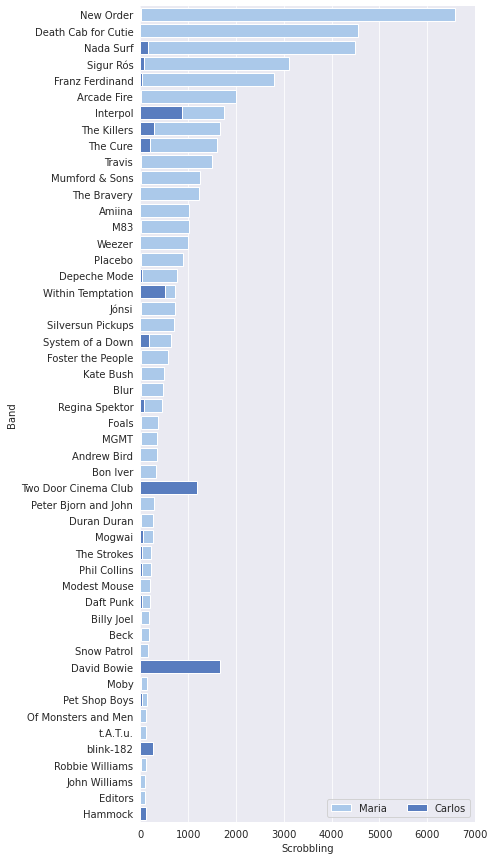

In [43]:
f, ax = plt.subplots(figsize=(6, 15))
sns.set_color_codes("pastel")
sns.barplot(x="Maria", y="Band", data=df_artist3.head(50),
            label="Maria", color="b")
sns.set_color_codes("muted")
sns.barplot(x="Carlos", y="Band", data=df_artist3.head(50),
            label="Carlos", color="b")
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 7000), ylabel="Band",
       xlabel="Scrobbling")
sns.despine(left=True, bottom=True)

<h2> 📍 To conclude, some important facts: </h2>

* 👾  Maria and I only have 6% of similar artists in the total of the artists we listened to. This percentage represents 348 artists, but most have only one song. The most representative artists are:New Order, Interpol, The Killers, Within Temptation and Two Door Cinema Club. 

* 👾  My data is the one with the highest percentage of errors. This must be because my main music source is MP3 files and it may have bad tags.

* 👾  The most popular years of using Last Fm for the two of us were 2013 and 2014.

* 👾  In 2020, due to the Covid-19 pandemic, we changed many patterns of behavior. This can be seen very clearly in our graphics; Maria didn't use Last Fm in 10 months, and I duplicated my numbers. 

* 👾 I am a more of a conservative person when it comes to my artists since it shows that through the years, they vary little. Maria, on the other hand, has a larger variety of artists.

To write this post I read a loooot of the Towards Datascience blog. https://towardsdatascience.com/ 👩‍💻

Thanks for reading, and remember I'm new in the data analytics/science world and English is not my native language. I'm still learning🧑‍🎓. If you could give me your feedback about these two topics, I would really appreciate it.🙇‍♂️

**Carlos Medina** 🎩